## The Big Six - xG Rolling Charts

In [195]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
import matplotlib.font_manager as fm
import matplotlib.colors as mcolors
from matplotlib import cm
from highlight_text import fig_text, ax_text
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib import cm
import matplotlib.gridspec as gridspec
import numpy as np

from PIL import Image
import urllib
import json
import os

In [196]:
from matplotlib.font_manager import FontProperties

# Specify your font
regular = FontProperties(fname="C:\\Users\\George\\Documents\\Football Analytics\\Kanit-Regular.ttf")  # Update the path to where the font is installed on your system
light = FontProperties(fname="C:\\Users\\George\\Documents\\Football Analytics\\Kanit-Light.ttf")  # Update the path to where the font is installed on your system
bold = FontProperties(fname="C:\\Users\\George\\Documents\\Football Analytics\\Kanit-Bold.ttf")  # Update the path to where the font is installed on your system

In [197]:
league = 'Premier League'
half = 'top'

### Define the color maps

Here we'll define a function that takes two colors and creates a gradient. I extracted the core code from the following [StackOverflow question](https://stackoverflow.com/questions/25668828/how-to-create-colour-gradient-in-python).

In [198]:
if league == 'Championship':
    if half == 'top':
        cm = {
            # Leicester
            '8197': {
                'low': '#FDBE11',
                'high': '#003090'
            },
            # Ipswich
            '9902': {
                'low': '#de2c37',
                'high': '#3a64a3'
            },
            # Leeds
            '8463': {
                'low': '#FFCD00',
                'high': '#1D428A'
            },
            # Southampton
            '8466': {
                'low': '#FFC20E',
                'high': '#D71920'
            },
            # West Brom
            '8659': {
                'low':'#808080',
                'high':'#122F67'
            },
            # Norwich 
            '9850':{
                'low':'#FFF200',
                'high':'#00A650'
            },
            # Hull
            '8667':{
                'low':'#231f20',
                'high':'#F18A01'
            },
            # Middlesbrough
            '8549':{
                'low':'#808080',
                'high':'#de1b22'
            },
            # Coventry
            '8669':{
                'low':'#ed1c24',
                'high':'#77bbff'
            },
            # Preston
            '8411':{
                'low':'#002156',
                'high':'#0072BA'
            },
            # Bristol City
            '8427':{
                'low':'#000000',
                'high':'#E21A23'
            },
            # Cardiff
            '8344':{
                'low':'#D11524',
                'high':'#0070B5'
            },
        }
    if half == 'bottom':
        cm = {
            # Millwall
            '10004': {
                'low': '#FFA500',
                'high': '#00194A'
            },
            # Swansea 
            '10003': {
                'low': '#000000',
                'high': '#FFFFFF'
            },
            # Watford
            '9817': {
                'low': '#ED2127',
                'high': '#FBEE23'
            },
            # Sunderland
            '8472': {
                'low': '#a68a26',
                'high': '#eb172b'
            },
            # Stoke
            '10194': {
                'low':'#1B449C',
                'high':'#E03A3E'
            },
            # QPR 
            '10172':{
                'low':'#FFFFFF',
                'high':'#1D5BA4'
            },
            # Blackburn
            '8655':{
                'low':'#009036',
                'high':'#009EE0'
            },
            # Sheff Weds
            '10163':{
                'low':'#e9b008',
                'high':'#0e62aa'
            },
            # Plymouth
            '8401':{
                'low':'#ffffff',
                'high':'#004f3e'
            },
            # Birmingham
            '8658':{
                'low':'#ffffff',
                'high':'#0000FF'
            },
            # Huddersfield
            '9796':{
                'low':'#fddd04',
                'high':'#176fc0'
            },
            # Rotherham
            '8119':{
                'low':'#231f20',
                'high':'#e21d25'
            }
        }

In [199]:
if league == 'Premier League':
    if half == 'top':
        cm = {
            # Man City
            '8456': {
                'low': '#00285e',
                'high': '#97c1e7'
            },
            # Arsenal
            '9825': {
                'low':'#063672',
                'high':'#db0007'
            },
            # Liverpool
            '8650': {
                'low': '#00B2A9',
                'high': '#C8102E'
            },
            # Aston Villa
            '10252': {
                'low': '#670e36',
                'high': '#95bfe5'
            },
            # Spurs
            '8586': {
                'low': '#0e9ca5',
                'high': '#132257'
            },
            # Chelsea
            '8455': {
                'low': '#d1d3d4',
                'high': '#034694'
            },
            # Newcastle
            '10261': {
                'low': '#41B6E6',
                'high': '#F9423A'
            },
            # Manchester United
            '10260':{
                'low':'#DBA111',
                'high':'#da020e'
            },
            # West Ham
            '8654':{
            'low':'#2dafe5',
            'high':'#7c2c3b'
            },
            # Crystal Palace
            '9826':{
            'low':'#C4122E',
            'high':'#1B458F'
            },
            # Brighton
            '10204': {
                'low': '#FFCD00',
                'high': '#0057B8'
            },
            # Bournemouth
            '8678': {
                'low':'#A89968',
                'high':'#B50E12'
            },
            # Fulham
            '9879': {
                'low': '#000000',
                'high': '#CC0000'
            },
            # Wolves
            '8602': {
                'low': '#231F20',
                'high': '#FDB913'
            },
            # Everton
            '8668': {
                'low': '#FFFFFF',
                'high': '#003399'
            },
            # Brentford
            '9937': {
                'low': '#fbb800',
                'high': '#e30613'
            },
            # Notts Forest
            '10203': {
                'low': '#FFFFFF',
                'high': '#DD0000'
            },
            # Luton
            '8346':{
                'low':'#002D62',
                'high':'#F78F1E'
            },
            # Burnley
            '8191':{
            'low':'#99D6EA',
            'high':'#6C1D45'
            },
            # Sheffield United
            '8657':{
            'low':'#FFEC2D',
            'high':'#EE2737'
            }
        }

In [200]:
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mcolors.to_rgb(c1))
    c2=np.array(mcolors.to_rgb(c2))
    return mcolors.to_hex((1-mix)*c1 + mix*c2)

### Reading the data

I have supplied a CSV file with xG figures for all EPL teams since the beginning of the 2020/2021 season. Feel free to use it for other purposes...

In [201]:
df = pd.read_csv(f"C:\\Users\\George\\Documents\\Football Analytics\\fotmob_{league}_expected_data.csv")
df = df.sort_values(by='date').reset_index(drop=True)
df.rename(columns={'id':'match_id'}, inplace=True)
df.head()

,match_id,date,team_name,team_id,xG_for,xG_ag,xGOT_for,xGOT_ag,goals_for,goals_ag,venue
0,4193450,2023-08-11 19:00:00+00:00,Burnley,8191,0.33,2.08,0.02,2.73,0,3,H
1,4193450,2023-08-11 19:00:00+00:00,Manchester City,8456,2.08,0.33,2.73,0.02,3,0,A
2,4193451,2023-08-12 12:00:00+00:00,Arsenal,9825,0.83,1.18,1.98,0.95,2,1,H
3,4193451,2023-08-12 12:00:00+00:00,Nottingham Forest,10203,1.18,0.83,0.95,1.98,1,2,A
4,4193452,2023-08-12 14:00:00+00:00,AFC Bournemouth,8678,1.37,1.07,1.40,0.70,1,1,H


### Function to create xG rolling data

In [202]:
df = df[['date', 'match_id', 'team_id', 'team_name', 'xG_ag', 'xG_for']]

In [203]:
def get_xG_rolling_data(team_id, window=10, df=df):
    '''
    This function returns xG rolling average figures for a specific team.
    '''
    #df = data.copy()
    #df_xg = df[(df['team_id'] == team_id) & (df['variable'].isin(['xG_for', 'xG_ag']))]
    #df_xg = (
    #    df_xg.pivot(
    #        index=['date', 'match_id', 'team_id', 'team_name'],
    #        columns=['variable'],
    #        values=['value']
    #    ).reset_index()
    #    .droplevel(level=0, axis=1)
    #)
    df_xg = df[df['team_id'] == team_id].reset_index(drop=True)
    df_xg.columns
    df_xg.columns = ['date', 'match_id', 'team_id', 'team_name', 'xG_ag', 'xG_for']
    df_xg['rolling_xG_for'] = df_xg['xG_for'].rolling(window=window, min_periods=0).mean()
    df_xg['rolling_xG_ag'] = df_xg['xG_ag'].rolling(window=window, min_periods=0).mean()
    df_xg['rolling_diff'] = df_xg['rolling_xG_for'] - df_xg['rolling_xG_ag']
    return df_xg

In [204]:
get_xG_rolling_data(10252)

,date,match_id,team_id,team_name,xG_ag,xG_for,rolling_xG_for,rolling_xG_ag,rolling_diff
0,2023-08-12 16:30:00+00:00,4193456,10252,Aston Villa,3.41,1.77,1.770000,3.410000,-1.640000
1,2023-08-20 13:00:00+00:00,4193470,10252,Aston Villa,0.63,3.00,2.385000,2.020000,0.365000
2,2023-08-27 13:00:00+00:00,4193484,10252,Aston Villa,0.73,2.70,2.490000,1.590000,0.900000
3,2023-09-03 13:00:00+00:00,4193496,10252,Aston Villa,2.47,0.66,2.032500,1.810000,0.222500
4,2023-09-16 14:00:00+00:00,4193501,10252,Aston Villa,1.17,3.21,2.268000,1.682000,0.586000
5,2023-09-24 13:00:00+00:00,4193514,10252,Aston Villa,1.33,1.07,2.068333,1.623333,0.445000
6,2023-09-30 11:30:00+00:00,4193521,10252,Aston Villa,1.71,1.58,1.998571,1.635714,0.362857
7,2023-10-08 13:00:00+00:00,4193539,10252,Aston Villa,1.68,1.61,1.950000,1.641250,0.308750
8,2023-10-22 15:30:00+00:00,4193541,10252,Aston Villa,1.16,1.94,1.948889,1.587778,0.361111
9,2023-10-29 14:00:00+00:00,4193552,10252,Aston Villa,0.48,2.28,1.982000,1.477000,0.505000


### Function to create auxiliary xG dataframe

In order to create gradients, we need to extend our dataframe and interpolate values

In [205]:
def get_xG_interpolated_df(team_id, window=10, data=df):
    # --- Get the xG rolling df
    df_xG = get_xG_rolling_data(team_id, window, data)
    # -- Create interpolated series
    df_xG['match_number'] = df_xG.index
    X_aux = df_xG.match_number.copy()
    X_aux.index = X_aux * 10 # 9 aux points in between each match
    last_idx = X_aux.index[-1] + 1
    X_aux = X_aux.reindex(range(last_idx))
    X_aux = X_aux.interpolate()
    # --- Aux series for the xG created (Y_for)
    Y_for_aux = df_xG.rolling_xG_for.copy()
    Y_for_aux.index = Y_for_aux.index * 10
    last_idx = Y_for_aux.index[-1] + 1
    Y_for_aux = Y_for_aux.reindex(range(last_idx))
    Y_for_aux = Y_for_aux.interpolate()
    # --- Aux series for the xG conceded (Y_ag)
    Y_ag_aux = df_xG.rolling_xG_ag.copy()
    Y_ag_aux.index = Y_ag_aux.index * 10
    last_idx = Y_ag_aux.index[-1] + 1
    Y_ag_aux = Y_ag_aux.reindex(range(last_idx))
    Y_ag_aux = Y_ag_aux.interpolate()
    # --- Aux series for the rolling difference in xG
    Z_diff_aux = df_xG.rolling_diff.copy()
    Z_diff_aux.index = Z_diff_aux.index * 10
    last_idx = Z_diff_aux.index[-1] + 1
    Z_diff_aux = Z_diff_aux.reindex(range(last_idx))
    Z_diff_aux = Z_diff_aux.interpolate()
    # -- Create the aux dataframe
    df_aux = pd.DataFrame({
        'X': X_aux,
        'Y_for': Y_for_aux,
        'Y_ag': Y_ag_aux,
        'Z': Z_diff_aux
    })
    return df_aux

### Function to plot the xG rolling chart

In [206]:
def plot_xG_gradient(ax, team_id, cm, window=10, data=df):
    # -- Get the data
    df_xg = get_xG_rolling_data(team_id, window, data)
    df_aux_xg = get_xG_interpolated_df(team_id, window, data)
    # Specify the axes limits
    ax.set_ylim(0,3.5)
    ax.set_xlim(-0.5,df_xg.shape[0])
    ax.grid(ls='--', color='lightgrey')
    # -- Select the colors
    color_1 = cm[str(team_id)]['low']
    color_2 = cm[str(team_id)]['high']

    ax.plot(df_xg.index, df_xg['rolling_xG_for'], color=color_2,zorder=4)
    ax.plot(df_xg.index, df_xg['rolling_xG_ag'], color=color_1,zorder=4)
    ax.fill_between(x=[-0.5,window], y1=ax.get_ylim()[0], y2=ax.get_ylim()[1], alpha=0.15, color='black', ec='None',zorder=2)
    vmin = df_xg['rolling_diff'].min()
    vmax = df_xg['rolling_diff'].max()
    vmax = max(abs(vmin), abs(vmax))
    vmin = -1*vmax
    for i in range(0, len(df_aux_xg['X']) - 1):
        ax.fill_between(
            [df_aux_xg['X'].iloc[i], df_aux_xg['X'].iloc[i+1]],
            [df_aux_xg['Y_for'].iloc[i], df_aux_xg['Y_for'].iloc[i + 1]],
            [df_aux_xg['Y_ag'].iloc[i], df_aux_xg['Y_ag'].iloc[i + 1]],
            color=colorFader(color_1, color_2, mix=((df_aux_xg['Z'].iloc[i] - vmin)/(vmax - vmin))),
            zorder=3, alpha=0.3
        )
    ##for x in [38, 38*2]:
      #  ax.plot([x,x],[ax.get_ylim()[0], ax.get_ylim()[1]], color='black', alpha=0.35, zorder=2, ls='dashdot', lw=0.95)
    text_ = ax.annotate(
                xy=(19,3.25),
                text='23/24 season',
                color='black',
                size=7,
                va='center',
                ha='center',
                fontproperties = regular,
                zorder=4
                )
    text_.set_path_effects(
            [path_effects.Stroke(linewidth=1.5, foreground='white'), path_effects.Normal()]
        )
    
    for label in ax.get_xticklabels():
        label.set_fontproperties(regular)
    for label in ax.get_yticklabels():
        label.set_fontproperties(regular)
    return ax

In [207]:
list(cm.keys())

['8456',
 '9825',
 '8650',
 '10252',
 '8586',
 '8455',
 '10261',
 '10260',
 '8654',
 '9826',
 '10204',
 '8678',
 '9879',
 '8602',
 '8668',
 '9937',
 '10203',
 '8346',
 '8191',
 '8657']

In [208]:
todays_date = pd.to_datetime('today').date()

In [209]:
df['team_name'] = df['team_name'].replace({'Milton Keynes Dons':'MK Dons','AFC Bournemouth':'Bournemouth','West Bromwich Albion':'West Brom','Preston North End':'Preston','Queens Park Rangers':'QPR','Blackburn Rovers':'Blackburn','Sheffield Wednesday':'Sheffield Weds','Huddersfield Town':'Huddersfield','Rotherham United':'Rotherham Utd', 'Tottenham Hotspur':'Tottenham', 'Newcastle United':'Newcastle Utd', 'Manchester United':'Manchester Utd', 'Brighton and Hove Albion':'Brighton','Brighton & Hove Albion':'Brighton', 'Wolverhampton Wanderers':'Wolves', 'Nottingham Forest':'Nott\'ham Forest', 'Sheffield United':'Sheffield Utd', 'Tottenham Hotspur': 'Tottenham'})

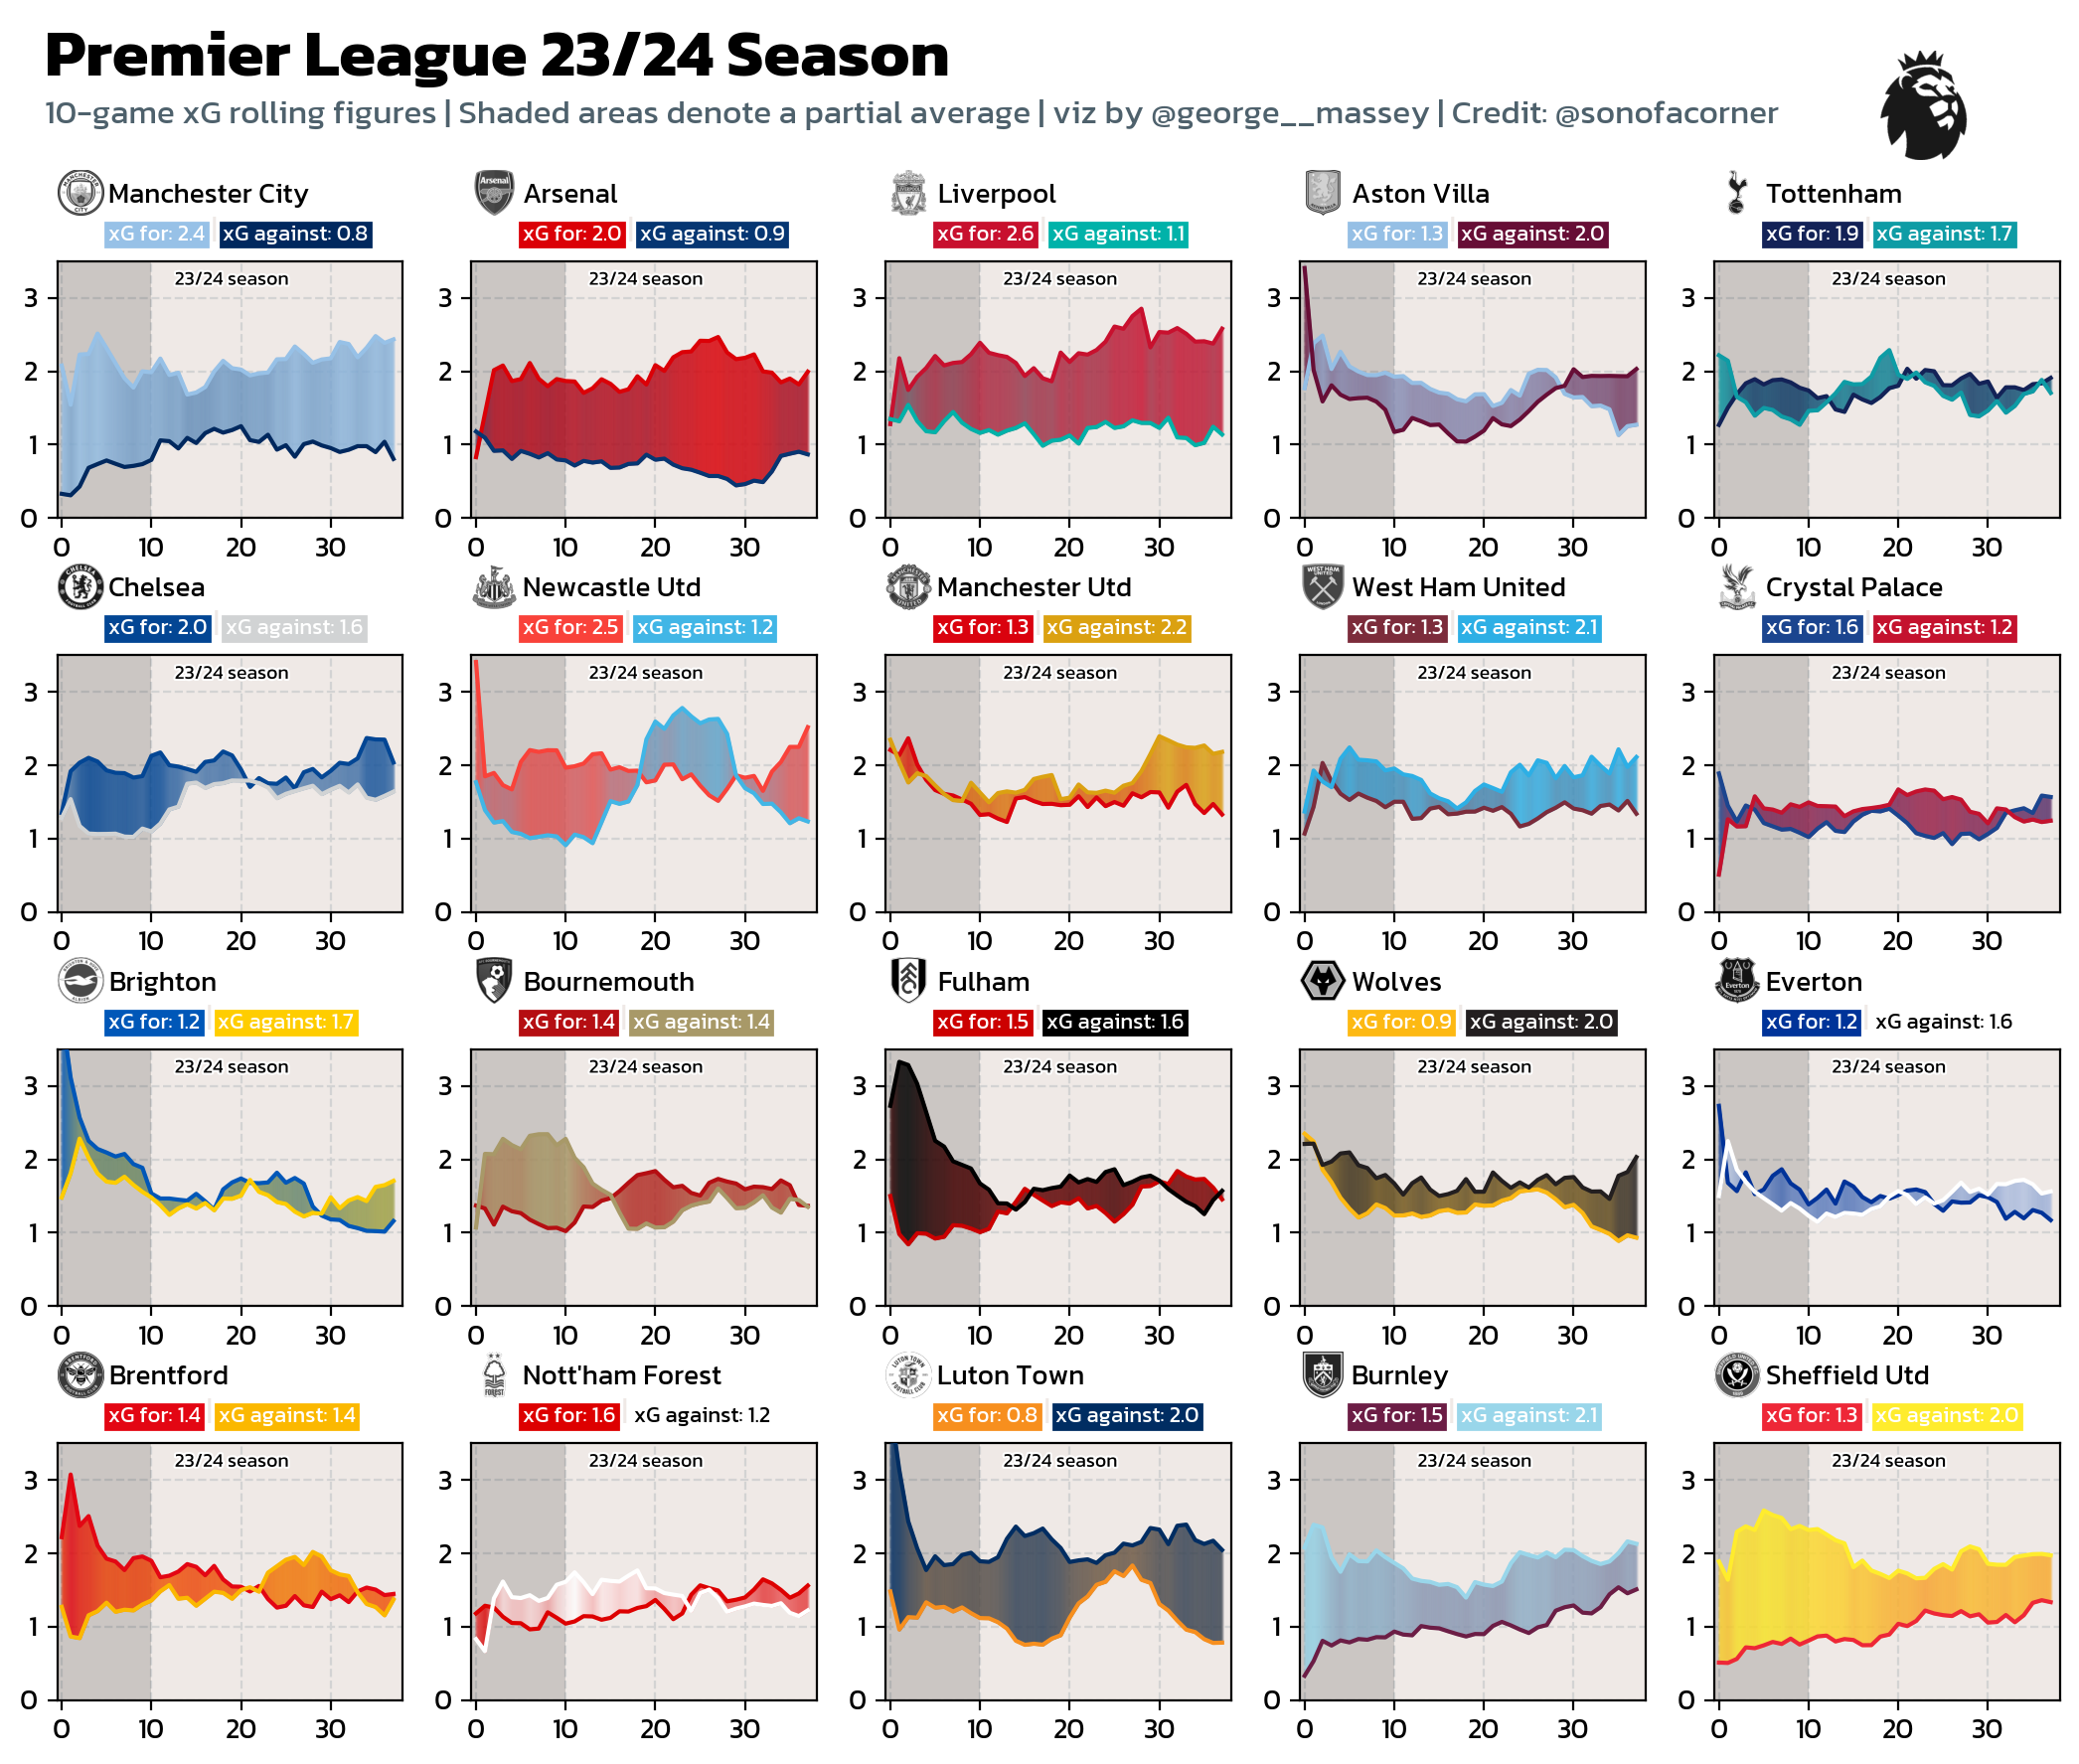

In [210]:
# ---- for path effects
def path_effect_stroke(**kwargs):
    return [path_effects.Stroke(**kwargs), path_effects.Normal()]
pe = path_effect_stroke(linewidth=1.5, foreground="black")
# ----
fig = plt.figure(figsize=(13, 10), dpi = 200)
nrows = 8
ncols = 5
gspec = gridspec.GridSpec(
    ncols=ncols, nrows=nrows, figure=fig, 
    height_ratios=[(1/nrows)*2.35 if x % 2 != 0 else (1/nrows)/2.35 for x in range(nrows)], hspace=0.3
)

plot_counter = 0
logo_counter = 0

for row in range(nrows):
    for col in range(ncols):
        if row % 2 != 0:
            ax = plt.subplot(
                gspec[row, col],
                facecolor = "#EFE9E6"
            )
            teamId = list(cm.keys())[plot_counter]
            teamId = int(teamId)
            plot_xG_gradient(ax, teamId, cm,10)           
            plot_counter += 1
        else:
            teamId = list(cm.keys())[logo_counter]
            color_1 = cm[str(teamId)]['low']
            color_2 = cm[str(teamId)]['high']
            # -- This was done manually cuz I'm lazy...
            if color_1 == '#FFFFFF' or color_1 == '#ffffff':
                color_1_t = 'black'
            else:
                color_1_t = 'white'
            if color_2 == '#FFFFFF' or color_2 == '#ffffff':
                color_2_t = 'black'
            else:
                color_2_t = 'white'
            teamId = int(teamId)
            df_for_text = get_xG_rolling_data(teamId, 10)
            teamName = df_for_text['team_name'].iloc[0]
            xG_for = df_for_text['rolling_xG_for'].iloc[-1]
            xG_ag = df_for_text['rolling_xG_ag'].iloc[-1]
            fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
            logo_ax = plt.subplot(
                gspec[row,col],
                anchor = 'W', facecolor = '#EFE9E6'
            )
            club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{teamId:.0f}.png')).convert('LA')
            logo_ax.imshow(club_icon)
            logo_ax.axis('off')
            # -- Add the team name
            ax_text(
                x = 1.1, 
                y = 0.7,
                s = f'<{teamName}>\n<xG for: {xG_for:.1f}> <|> <xG against: {xG_ag:.1f}>',
                ax = logo_ax, 
                highlight_textprops=[
                    {'weight':'bold', 'font':regular},
                    {'size':'8', 'bbox': {'edgecolor': color_2, 'facecolor': color_2, 'pad': 1}, 'color': color_2_t}, 
                    {'color':'#EFE9E6'},
                    {'size':'8', 'bbox': {'edgecolor': color_1, 'facecolor': color_1, 'pad': 1}, 'color': color_1_t}
                ],
                fontproperties = regular, 
                ha = 'left', 
                size = 10, 
                annotationbbox_kw = {'xycoords':'axes fraction'}
            )
            logo_counter += 1

fig_text(
    x=0.12, y=.92, 
    s=f'{league} 23/24 Season',
    va='bottom', ha='left',
    fontsize=24, color='black', fontproperties = bold, weight='bold'
)
fig_text(
	x=0.12, y=.9, 
    s='10-game xG rolling figures | Shaded areas denote a partial average | viz by @george__massey | Credit: @sonofacorner',
	va='bottom', ha='left',
	fontsize=12, color='#4E616C', fontproperties = regular
)
fotmob_url = 'https://images.fotmob.com/image_resources/logo/leaguelogo/'
logo_ax = fig.add_axes(
    [.82, .885, .055, .055]
)
club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{47:.0f}.png')).convert('LA') # change number for diff league 
logo_ax.imshow(club_icon)
logo_ax.axis('off')

plt.savefig(
	f"C:\\Users\\George\\Documents\\Football Analytics\\Visuals\\{league} xG Rolling {todays_date}.png",
	dpi = 600,
	facecolor = "#EFE9E6",
	bbox_inches="tight",
    edgecolor="none",
	transparent = False
)